# Processing all codex data

In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import anndata as ad
from scipy.sparse import csr_matrix

In [2]:
out_root = '../../Data/CellSeg/output/quantifications/'
outf = os.listdir(out_root)

In [24]:
def process_seg(sfile):
    dat = pd.read_csv(sfile, index_col=0)
    # dat.drop(columns=['BCL-6', 'CD30'], inplace=True)
    dat.index = dat.index.map(str)
    counts = csr_matrix(np.array(dat.iloc[:,9:]))
    adata = ad.AnnData(counts)
    adata.obs_names = dat.index
    adata.var_names = list(dat.columns[9:])
    adata.obs = dat.iloc[:,0:9]
    sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
    return adata
    
def finish_process(a, g, c):
    a = a[a.obs.n_genes_by_counts > g, :]
    a = a[a.obs.total_counts < c, :]
    sc.pp.normalize_total(a, target_sum=1e4)
    a.raw = a
    sc.pp.scale(a)
    return a

In [25]:
for f in outf:
    print('working on {}'.format(f))
    dat_path = os.path.join(out_root, f)
    dat_out = process_seg(dat_path)
    dat_out = finish_process(dat_out, 25, 2000)
    out_name = f[:-4] + '.h5ad'
    dat_out.write(os.path.join('../../outs/simple_h5ad/', out_name))

working on K2_reg1_statistics_growth5_comp.csv
working on HVCD1_reg3_statistics_growth5_comp.csv
working on HVCD1_reg1_statistics_growth5_comp.csv
working on K2_reg4_statistics_growth5_comp.csv
working on HVCD2_reg1_statistics_growth5_comp.csv
working on CD1_reg1_statistics_growth5_comp.csv
working on K2_reg3_statistics_growth5_comp.csv
working on MCD3_reg1_statistics_growth5_comp.csv
working on K1_reg4_statistics_growth5_comp.csv
working on HVCD2_reg4_statistics_growth5_comp.csv
working on K3_reg1_statistics_growth5_comp.csv
working on K3_reg4_statistics_growth5_comp.csv
working on K1_reg3_statistics_growth5_comp.csv
working on K3_reg3_statistics_growth5_comp.csv
working on K3_reg2_statistics_growth5_comp.csv
working on R1_reg2_statistics_growth5_comp.csv
working on R2_reg1_statistics_growth5_comp.csv
working on K1_reg2_statistics_growth5_comp.csv
working on MCD1_reg3_statistics_growth5_comp.csv
working on K2_reg2_statistics_growth5_comp.csv
working on MCD1_reg2_statistics_growth5_com

K3_reg2_statistics_growth5_comp.csv


/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


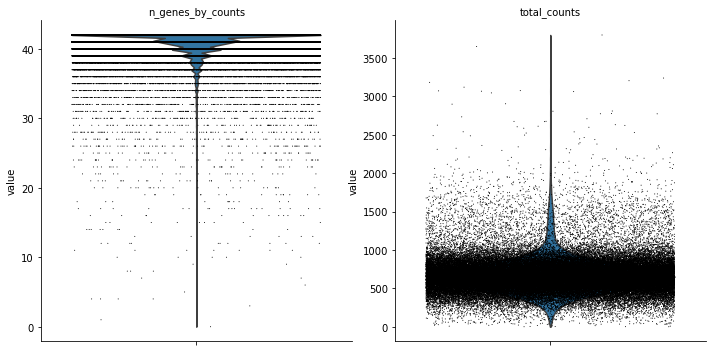

In [21]:
# going to do 1-by-1 
f = outf[14]
print(f)
dat_path = os.path.join(out_root, outf[0])
dat_out = process_seg(dat_path)
sc.pl.violin(dat_out, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [19]:
dat_out = finish_process(dat_out, 25, 2000)
out_name = f[:-4] + '.h5ad'
dat_out.write(os.path.join('../../outs/simple_h5ad/', out_name))

/mnt/isilon/cscb/software/anaconda3/envs/scanpy-basic/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [10]:
f = outf[0]

In [11]:
f

'K2_reg1_statistics_growth5_comp.csv'